# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [16]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 110.0.5481
Get LATEST chromedriver version for 110.0.5481 google-chrome
Driver [C:\Users\liz14\.wdm\drivers\chromedriver\win32\110.0.5481.77\chromedriver.exe] found in cache


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [18]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url="https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [19]:
# Create a Beautiful Soup object to parse the HTML.

html = browser.html
soup = soup(html, "html.parser")

In [20]:
# Extract all rows of data
data_rows=soup.find_all('tr',class_='data-row')

# Print rows of data.
print(data_rows)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
# Create empty list (LIST_MARSWEATHER) to store table data.
list_marsweather=[]

# Loop through table. Search and extract rows of mars data.
for row in data_rows:
    contents = row.find_all('td')
    
    # Extract the mars data inside the table.
    data = [content.text for content in contents]
    
    # Append the text to the list
    list_marsweather.append(data)


In [22]:
# Print LIST_MARSWEATHER for confirmation.
list_marsweather

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [23]:
# Assemble the scraped data into a Pandas DataFrame.

columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure']
marsweather_df=pd.DataFrame(list_marsweather, columns=columns)

In [24]:
# Print MARSWEATHER_DF for confirmation.
marsweather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine MARSWEATHER_DF data types associated with each column.
marsweather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [26]:
# For data analysis, update/change the data types.

marsweather_df['id']=marsweather_df['id'].astype(int)
marsweather_df['terrestrial_date']=pd.to_datetime(marsweather_df['terrestrial_date'])
marsweather_df['sol']=marsweather_df['sol'].astype(int)
marsweather_df['ls']=marsweather_df['ls'].astype(int)
marsweather_df['month']=marsweather_df['month'].astype(int)
marsweather_df['min_temp']=marsweather_df['min_temp'].astype(float)
marsweather_df['pressure']=marsweather_df['pressure'].astype(float)

In [27]:
# Review/Print MARSWEATHER_DF data types to ensure data type was updated.
marsweather_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months exist on Mars?

totmonths = marsweather_df['month'].max()
print(f"Mars has a maximum of", totmonths, "months a year.")

Mars has a maximum of 12 months a year.


In [29]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

sol = marsweather_df['sol'].nunique()
sol
print(f"There are", sol, "Martian days' worth of data. ")

There are 1867 Martian days' worth of data. 


In [30]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# FIRST...
# 3a) Find average minimum daily temperature for all of the months.
# 3b) Plot the results as a bar chart.

# 3a) Average temp by month.
month = marsweather_df.groupby('month')
avg_monthlytemp = month['min_temp'].mean().round(decimals = 2)

#print(avg_min_temp)

avg_monthlytemp_df = pd.DataFrame(avg_monthlytemp)
avg_monthlytemp_df

,min_temp
month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


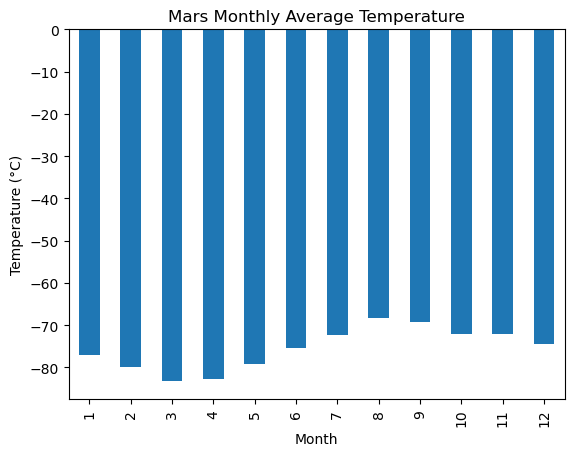

In [31]:
# 3b) Plot average temperature by month as bar chart.

avg_monthlytemp.plot(kind='bar')

# Bar chart labels
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Save image
plt.title('Mars Monthly Average Temperature')
plt.savefig('MarsMonthly_AvgTemp.png')
plt.show()

In [32]:
# 3) What are the coldest and the warmest months on Mars (at the location of Curiosity)? 


# Out of the 12 mars months, pulling the average CODEST temp from avg_monthlytemp dataset.

cold_avg_temp = avg_monthlytemp_df['min_temp'].min()
cold_month = avg_monthlytemp_df['min_temp'].idxmin()

print("On average, the coldest month at Curiosity's location on Mars and its corresponding temperature:")
print(cold_month," ",cold_avg_temp)

#print(cold_month)
#print(cold_avg_temp)


On average, the coldest month at Curiosity's location on Mars and its corresponding temperature:
3   -83.31


In [33]:
# 3) What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

# Out of the 12 mars months, pulling the average WARMEST/HOTTEST temp from avg_monthlytemp dataset.

warm_avg_temp = avg_monthlytemp_df['min_temp'].max()
warm_avg_month = avg_monthlytemp_df['min_temp'].idxmax()

print("On average, the warmest month at Curiosity's location on Mars and its corresponding temperature:")
print(warm_avg_month," ",warm_avg_temp)

# print(warm_avg_month)
# print(warm_avg_temp)

On average, the warmest month at Curiosity's location on Mars and its corresponding temperature:
8   -68.38


In [34]:
# 4)  Which months have the lowest and the highest atmospheric pressure on Mars?
# 4a) Find the average the daily atmospheric pressure of all the months.
# 4b) Plot the results as a bar chart.

In [35]:
# 4a) Find the average the daily atmospheric pressure of all the months.

# Average pressure by month.
pressure_month = marsweather_df.groupby('month')

#avg_monthlypressure = pressure_month['pressure'].mean()
avg_monthlypressure = pressure_month['pressure'].mean().round(decimals = 2)

#print(avg_monthlypressure)

avg_monthlypressure_df = pd.DataFrame(avg_monthlypressure)
avg_monthlypressure_df

,pressure
month,
1,862.49
2,889.46
3,877.32
4,806.33
5,748.56
6,745.05
7,795.11
8,873.83
9,913.31


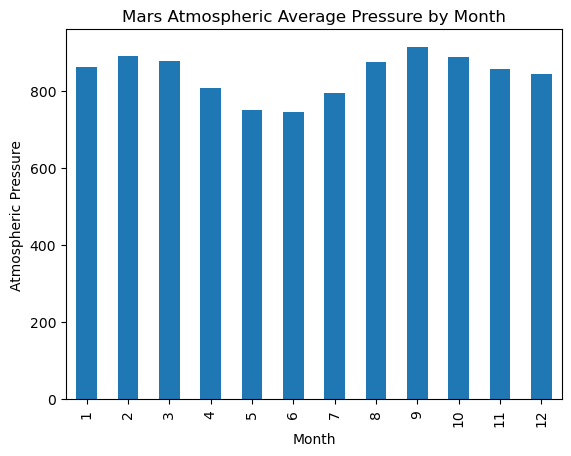

In [36]:
# 4b) Plot average pressure by month as bar chart.

avg_monthlypressure.plot(kind='bar')

# Bar chart labels
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Save image
plt.title('Mars Atmospheric Average Pressure by Month')
plt.savefig('MarsMonthly_AvgPressure.png')
plt.show()

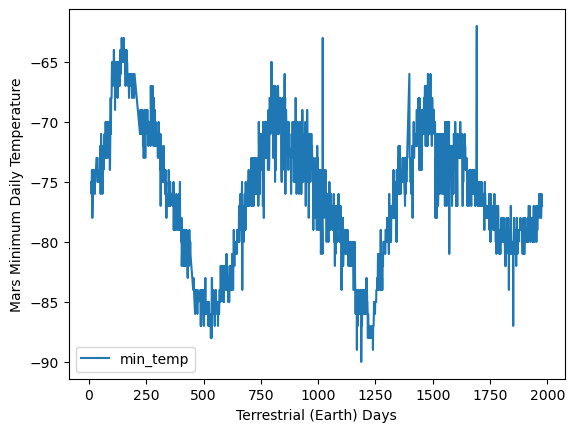

In [37]:
# 5)  About how many terrestrial (Earth) days exist in a Martian year? 
# 5a) Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# 5b) Visually estimate the result by plotting the daily minimum temperature.

sortbysol = marsweather_df.sort_values('sol')
#print(sortbysol)

sortbysol.plot(x='sol', y='min_temp')

# Bar chart labels
plt.xlabel('Terrestrial (Earth) Days')
plt.ylabel('Mars Minimum Daily Temperature')

# Save image
plt.savefig('MarsMinimum_DailyTemperature.png')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV

marsweather_df.to_csv('marsweather.csv', index=False)

In [39]:
browser.quit()